In [1]:
import pandas as pd

In [ ]:
# Reading the dataframe of rooftop PV postcodes that includes their lat, lng, and the WPE at their locations
# Created in the code associated named "Fig10.ipynb"

postcode_df = pd.read_pickle("Processed_data/PostcodeLocationDF.pkl")
sa_postcodes_df = postcode_df.loc[(postcode_df['postcode'] > 4999) & (postcode_df['postcode'] < 6000), :]

In [2]:
# PV integration data from Australian PV Institute (APVI) Solar Map, funded by the Australian Renewable Energy Agency,
# accessed from pv-map.apvi.org.au on 10 March 2022.

pv_integration_df = pd.read_csv('Input_data/lgas_6b8e.csv')
sa_pv_integ_df = pv_integration_df[pv_integration_df['lga_state'] == 'SA']

C:\Users\a1792406\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=136.5,-38.5,141.1,-32.5&bboxSR=4326&imageSR=4326&size=1500,1956&dpi=96&format=png32&transparent=true&f=image


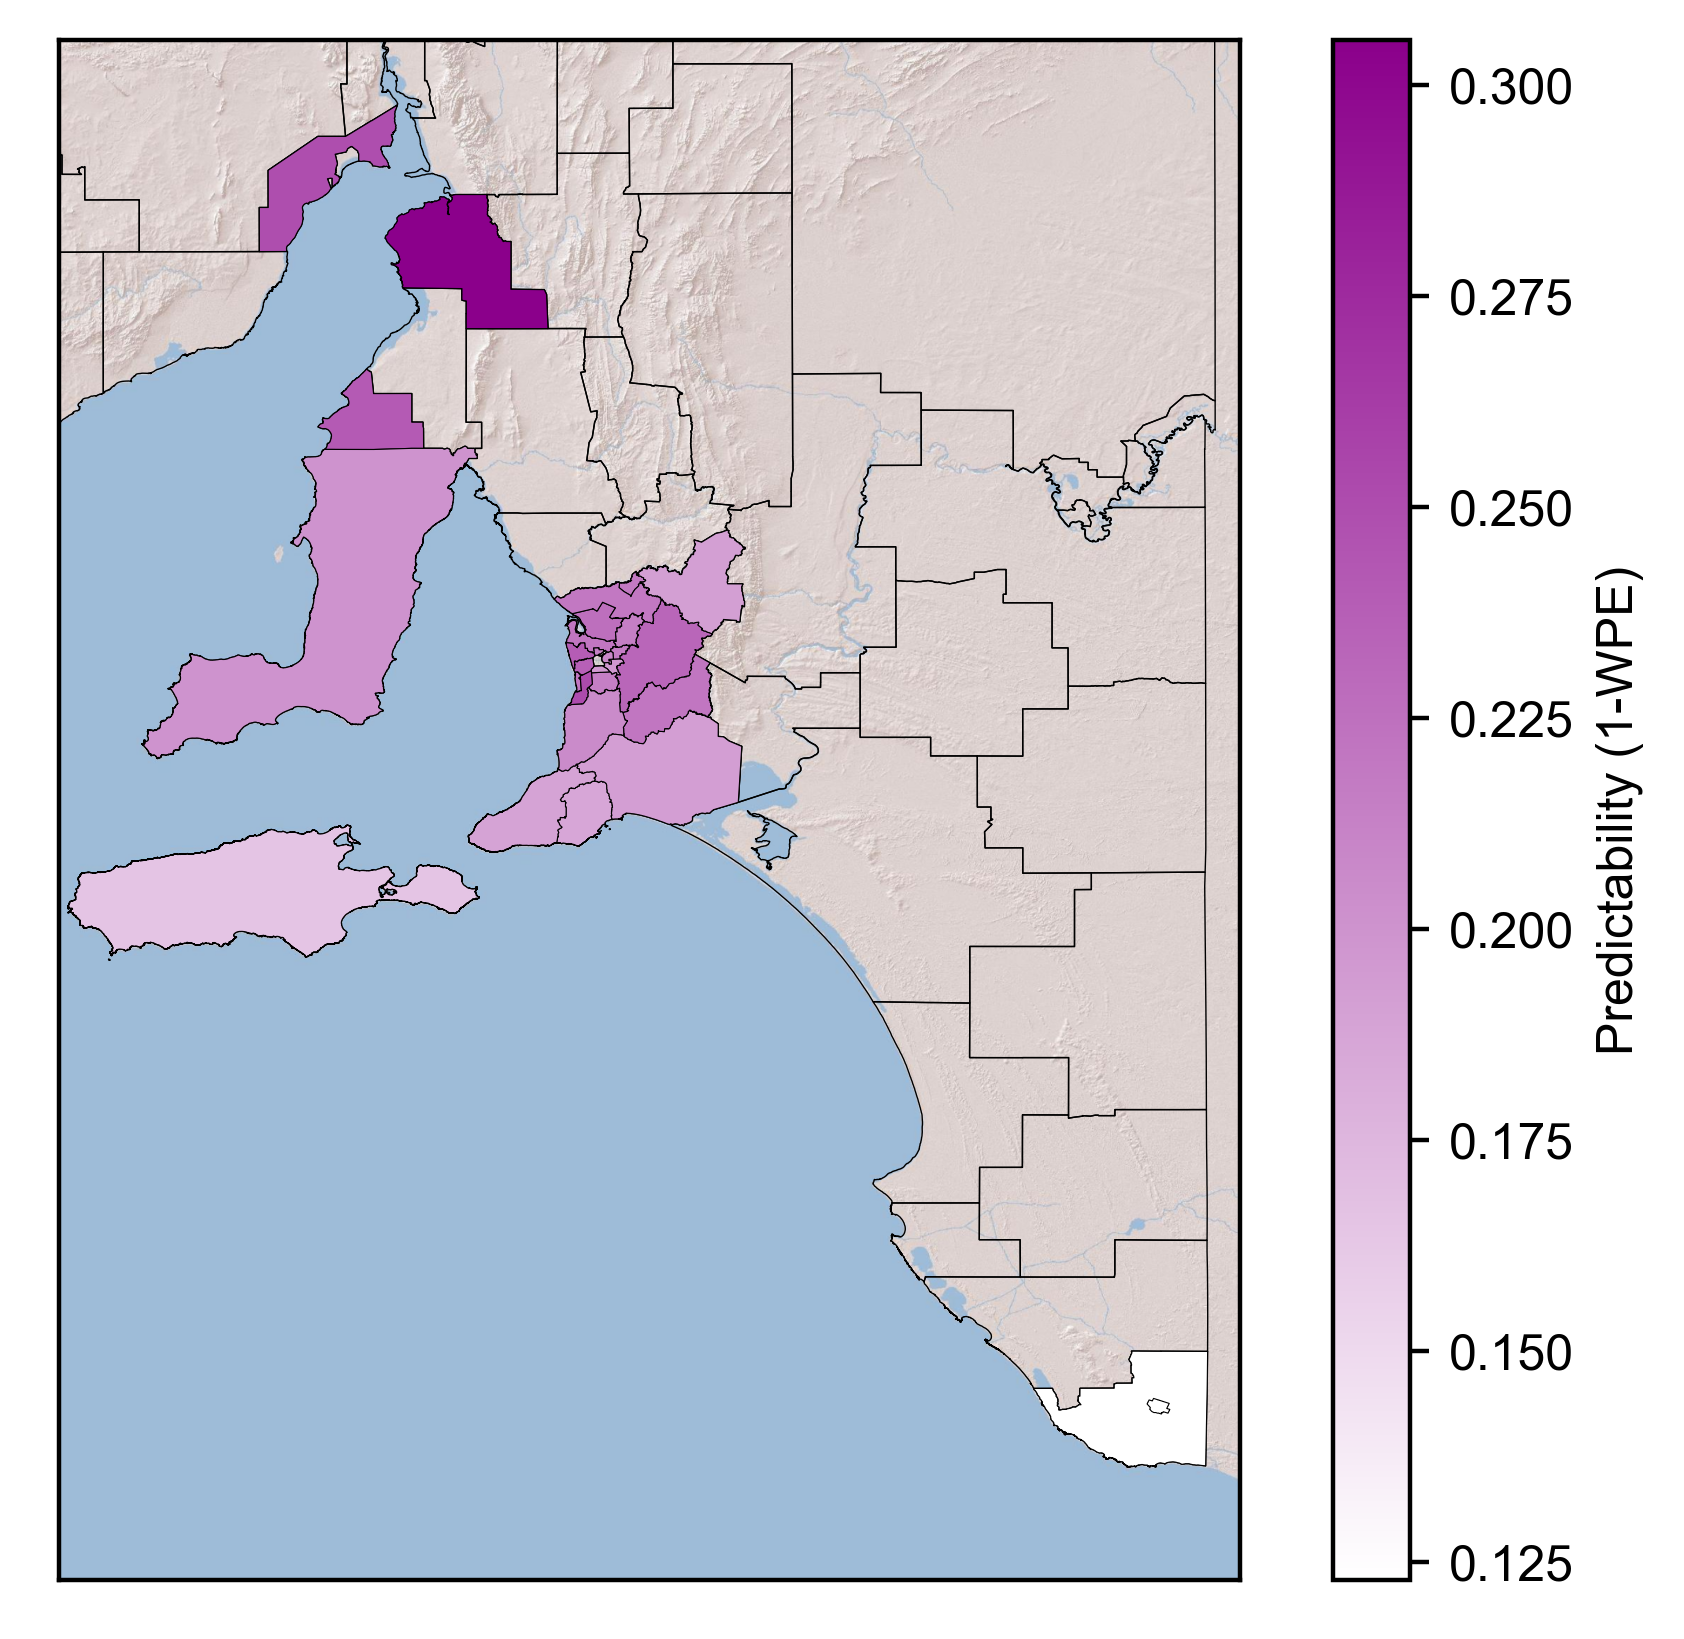

In [9]:
# Plotting Figure 11
# The SA LGA (local government area) data is developed by Location SA, Department for Infrastructure and Transport.
# Retrieved on: 28/02/2022. URL: http://location.sa.gov.au/LMS/Reports/

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import fiona
import geopandas
import geoplot
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Path
from matplotlib.collections import PatchCollection
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
plt.style.use('default')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 9
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400


fig = plt.figure(figsize = (6,5))
ax  = fig.add_subplot(111)

m = Basemap(projection='cyl', resolution='h', llcrnrlat=-38.5, urcrnrlat=-32.5, llcrnrlon=136.5, urcrnrlon=141.1)
m.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)
m.readshapefile("LGA_GDA2020", 'LGA',  drawbounds=True, linewidth=0.25, color='black')

for info, district in zip(m.LGA_info, m.LGA):
    avg_wpe = 0
    number_of_sites = 0
    for j in sa_postcodes_df.index:
        p1 = Point(sa_postcodes_df.loc[j, 'lng'], sa_postcodes_df.loc[j, 'lat'])
        if (p1.within(Polygon(np.array(district)))):
            avg_wpe = (avg_wpe * number_of_sites + sa_postcodes_df.loc[j, 'AverageWPE'] * sa_postcodes_df.loc[j, 'NumberofHouses']) / (sa_postcodes_df.loc[j, 'NumberofHouses'] + number_of_sites)
            number_of_sites = number_of_sites + sa_postcodes_df.loc[j, 'NumberofHouses']
    info['NumberofHouses'] = number_of_sites
    info['AverageWPE'] = avg_wpe

for info, shape in zip(m.LGA_info, m.LGA):
    info['coords'] = Polygon(np.array(shape)).representative_point().coords[:]
    info['coords'] = info['coords'][0]
    for j in sa_pv_integ_df.index:
        info['PVexist'] = 0
        if info['abbname'].lower() == sa_pv_integ_df.loc[j, 'lga_name'].split(' (')[0].lower():
            info['PVdens'] = sa_pv_integ_df.loc[j, 'density_lga']
            info['PVexist'] = 1
            break

cmap = mcol.LinearSegmentedColormap.from_list("MyCmapName",["white","darkmagenta"])
norm=plt.Normalize(1 - max(sa_postcodes_df['AverageWPE']), 1 - min(sa_postcodes_df['AverageWPE']))

pc = PatchCollection(patches, match_original=True, edgecolor='k', linewidth = 0.2, zorder=2)
ax.add_collection(pc)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([1 - i for i in sa_postcodes_df['AverageWPE'].tolist()])
fig.colorbar(sm, ax=ax, label = 'Predictability (1-WPE)')

plt.savefig("Figure11.png", dpi=400, bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import fiona
import geopandas
import geoplot
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Path
from matplotlib.collections import PatchCollection
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

plt.style.use('default')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 9
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400

fig = plt.figure()
ax  = fig.add_subplot(111)
fig.set_size_inches(2, 2)

m = Basemap(projection='cyl', resolution='h', llcrnrlat=-35.25, urcrnrlat=-34.5, llcrnrlon=138.4, urcrnrlon=139.1)

m.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)
m.readshapefile("LGA_GDA2020", 'LGA',  drawbounds=True, linewidth=0.3, color='black')

for info, district in zip(m.LGA_info, m.LGA):
    avg_wpe = 0
    number_of_sites = 0
    for j in sa_postcodes_df.index:
        p1 = Point(sa_postcodes_df.loc[j, 'lng'], sa_postcodes_df.loc[j, 'lat'])
        if (p1.within(Polygon(np.array(district)))):
            avg_wpe = (avg_wpe * number_of_sites + sa_postcodes_df.loc[j, 'AverageWPE'] * sa_postcodes_df.loc[j, 'NumberofHouses']) / (sa_postcodes_df.loc[j, 'NumberofHouses'] + number_of_sites)
            number_of_sites = number_of_sites + sa_postcodes_df.loc[j, 'NumberofHouses']
    info['NumberofHouses'] = number_of_sites
    info['AverageWPE'] = avg_wpe

for info, shape in zip(m.LGA_info, m.LGA):
    info['coords'] = Polygon(np.array(shape)).representative_point().coords[:]
    info['coords'] = info['coords'][0]
    for j in sa_pv_integ_df.index:
        info['PVexist'] = 0
        if info['abbname'].lower() == sa_pv_integ_df.loc[j, 'lga_name'].split(' (')[0].lower():
            info['PVdens'] = sa_pv_integ_df.loc[j, 'density_lga']
            info['PVexist'] = 1
            break

cmap = mcol.LinearSegmentedColormap.from_list("MyCmapName",["white","darkmagenta"])

norm=plt.Normalize(1 - max(sa_postcodes_df['AverageWPE']), 1 - min(sa_postcodes_df['AverageWPE']))

pc = PatchCollection(patches, match_original=True, edgecolor='k', linewidth = 0.3, zorder=2)
ax.add_collection(pc)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([1 - i for i in sa_postcodes_df['AverageWPE'].tolist()])

plt.savefig("Figure11_Zoomedin.png", dpi=400, bbox_inches='tight')

In [ ]:
# Note that the PV density percentages are added manually on the final figure,
# using the PV integration dataset from APVI.